In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('dataset.csv')

In [4]:
# Print first 5 rows
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# An overview of the dataset's structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
# Check for missing values
print(df.isnull().sum())  # Identify columns with missing values, if any

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
genre_counts = df['track_genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts)



                 Genre  Count
0             acoustic   1000
1            punk-rock   1000
2    progressive-house   1000
3            power-pop   1000
4                  pop   1000
..                 ...    ...
109               folk   1000
110                emo   1000
111         electronic   1000
112            electro   1000
113        world-music   1000

[114 rows x 2 columns]


In [11]:
counts_equal_1000 = (genre_counts['Count'] == 1000).all()
print("Counts are equal to 1000 for all genres:", counts_equal_1000)


Counts are equal to 1000 for all genres: True


dataset is balanced as there are 1000 instances for each class. This balance can help prevent biases toward any particular genre during the training process and can potentially lead to more accurate and reliable genre classification results.

In [12]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [31]:
# Separating the features into numerical and categorical

numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

categorical_features = ['explicit', 'key', 'mode', 'time_signature']
target_variable = 'track_genre'

From categorical coulmns, we do not include 'track_id', 'artists', 'album_name', 'track_name' in features for training the model. Also, 'track_genre' is deleted from the list as it is the y variable. 

In [15]:
# Numeric features statistics
df[numerical_features].describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


Features have different scales, scaling is needed in the preprocessing step.

In [16]:
# Categorical features
for feature in categorical_features:
    print(df[feature].value_counts())

False    104253
True       9747
Name: explicit, dtype: int64
7     13245
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: key, dtype: int64
1    72681
0    41319
Name: mode, dtype: int64
4    101843
3      9195
5      1826
1       973
0       163
Name: time_signature, dtype: int64


Correlation of features 

Note: When the target variable is a category or a class, traditional correlation metrics such as Pearson's correlation or Spearman's rank correlation are not ideal. These correlation measures are designed for continuous variables and may not provide meaningful results for a categorical target.

What is the behaviour of .corr() function when dealing with features?

In Python, when you use the .corr() function from pandas on a DataFrame, it computes the pairwise correlation of columns, excluding null values. By default, it uses the Pearson correlation, which measures the linear relationship between two datasets.

The catch here is that Pearson correlation, and most other standard correlation measures, assume that both variables are numerical. They calculate the correlation based on numerical operations which don't make sense for categorical data. Therefore, when you apply .corr() to a DataFrame that includes categorical features, those categorical columns are typically ignored and only the numerical columns are included in the correlation matrix.
There are other statistics that can provide some insight into the relationships between your predictors and a categorical target variable, such as Chi-Square Test, and ANOVA (Analysis of Variance).

In [18]:
# Concatenate the numerical and categorical features

selected_features = numerical_features + categorical_features + [target_variable]

# Create a subset of the dataframe with the selected features
subset_df = df[selected_features]

In [32]:
# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

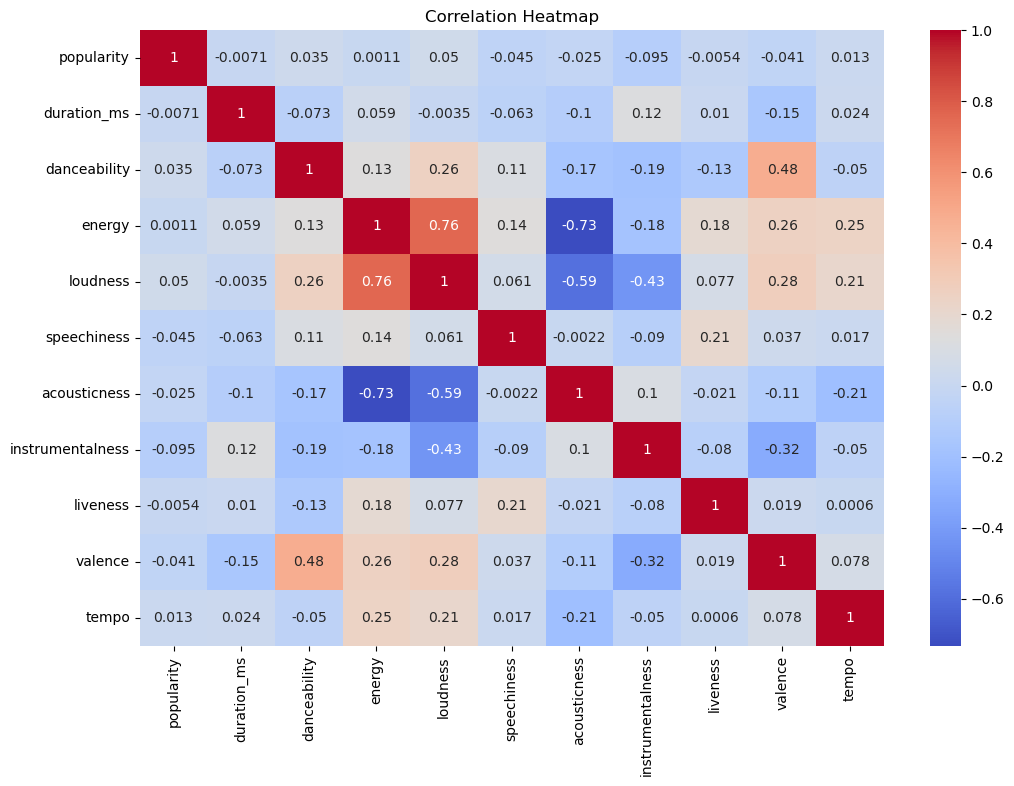

In [33]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
corr_matrix

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.007101,0.035448,0.001056,0.050423,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205
duration_ms,-0.007101,1.000000,-0.073426,0.058523,-0.003470,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346
danceability,0.035448,-0.073426,1.000000,0.134325,0.259077,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450
energy,0.001056,0.058523,0.134325,1.000000,0.761690,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851
loudness,0.050423,-0.003470,0.259077,0.761690,1.000000,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446
speechiness,-0.044927,-0.062600,0.108626,0.142509,0.060826,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273
acousticness,-0.025472,-0.103788,-0.171533,-0.733906,-0.589803,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224
instrumentalness,-0.095139,0.124371,-0.185606,-0.181879,-0.433477,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330
liveness,-0.005387,0.010321,-0.131617,0.184796,0.076899,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600
valence,-0.040534,-0.154479,0.477341,0.258934,0.279848,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273


Some observations from the correlation matrix:

1. **Energy and Loudness**: These two variables have a strong positive correlation (0.761690), implying that as the energy of a song increases, the loudness tends to increase as well.

2. **Energy and Acousticness**: These variables have a strong negative correlation (-0.733906), indicating that as the energy of a song increases, it is likely to be less acoustic.

3. **Danceability and Valence**: They have a moderate positive correlation (0.477341). This suggests that songs with higher danceability are often associated with higher valence (musical positiveness).

4. **Loudness and Acousticness**: They have a moderate negative correlation (-0.589803), indicating that louder songs are less likely to be acoustic.

5. **Instrumentalness and Loudness**: These have a moderate negative correlation (-0.433477). This implies that songs with higher instrumentalness are generally quieter.

6. **Popularity**: This doesn't have a high correlation with any of the other features. The highest correlation is with Loudness (0.050423), but it's very weak. This suggests that the popularity of a song is not heavily influenced by any single listed audio feature.

Note: these are based on the correlation alone, which only measures linear relationships. More importantly: correlation does not imply causation; just because two variables are correlated does not mean that one directly affects the other.